In [ ]:
from google.colab import drive
drive.mount("/content/drive" ,force_remount=True)

Mounted at /content/drive


In [ ]:
# for weather_dataset(11 class) ,weather_dataset2(4 class)

In [ ]:
DATA="//content/drive/MyDrive/Thesis/weather_dataset_11"

In [ ]:
CLASS1 = ["dew", "fogsmog" ,"frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]
CLASS2 = ["cloudy","rain","shine","sunrise"]

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio( DATA, output="output_11", seed=1337, ratio=(0.8, 0.1,0.1)) 

Copying files: 4747 files [01:41, 46.75 files/s] 


In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import pickle

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Activation ,Input,Dropout,BatchNormalization
from keras.models import Model
from keras.regularizers import l2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
DIRECTORY = "/content/drive/MyDrive/Thesis/weather_dataset_11"
#CATEGORIES = ['train', 'valid']
CATEGORIES= ["dew", "fogsmog" ,"frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]
#CATEGORIES= ["cloudy","rain","shine","sunrise"]

In [ ]:
IMG_SIZE =128

In [ ]:
data = []

In [ ]:
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    print(folder)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        if type(img_arr) is np.ndarray:
            if img_arr.size == 0:
                continue
        if img_arr is None:
          continue
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

/content/drive/MyDrive/Thesis/weather_dataset_11/dew
/content/drive/MyDrive/Thesis/weather_dataset_11/fogsmog
/content/drive/MyDrive/Thesis/weather_dataset_11/frost
/content/drive/MyDrive/Thesis/weather_dataset_11/glaze
/content/drive/MyDrive/Thesis/weather_dataset_11/hail
/content/drive/MyDrive/Thesis/weather_dataset_11/lightning
/content/drive/MyDrive/Thesis/weather_dataset_11/rain
/content/drive/MyDrive/Thesis/weather_dataset_11/rainbow
/content/drive/MyDrive/Thesis/weather_dataset_11/rime
/content/drive/MyDrive/Thesis/weather_dataset_11/sandstorm
/content/drive/MyDrive/Thesis/weather_dataset_11/snow


In [ ]:
len(data),type(data)

(4742, list)

In [ ]:
random.shuffle(data)

In [ ]:
train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.15,
                                   zoom_range = 0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   horizontal_flip =True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.15,
                                   zoom_range = 0.2,
                                    width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip =True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/output_11/train",
                                                target_size=(128,128),
                                                batch_size= 16,
                                                  shuffle=True,
                                                 class_mode='categorical')

Found 3795 images belonging to 11 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory("/content/output_11/val",
                                                target_size=(128,128),
                                                batch_size= 16,
                                                 shuffle=False,
                                                class_mode='categorical')

Found 472 images belonging to 11 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/output_11/test",
                                           target_size = (128,128),
                                           batch_size = 16,
                                            shuffle=False,
                                            class_mode='categorical')


Found 480 images belonging to 11 classes.


In [ ]:
input_shape=(128,128,3)


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors


model.add(Dense(2048, kernel_regularizer=l2( 0.001 )))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1024, kernel_regularizer=l2( 0.001 )))
model.add(Activation('relu'))

model.add(Dense(1024, kernel_regularizer=l2( 0.001 )))
model.add(Activation('relu'))

# model.add(Dropout(0.5))

model.add(Dense(11))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 activation (Activation)     (None, 126, 126, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 124, 124, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [ ]:
################################
# Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('weather_cnn.h5', monitor='val_accuracy', mode='max', save_best_only=True)

callbacks = [
        checkpointer,
        #tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', mode="min"),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
history = model.fit(training_set,  epochs=150, validation_data = validation_set, callbacks= callbacks)


Epoch 1/150
238/238 [==============================] - 76s 263ms/step - loss: 4.9627 - accuracy: 0.2211 - val_loss: 3.4426 - val_accuracy: 0.3898
Epoch 2/150
238/238 [==============================] - 55s 232ms/step - loss: 2.9876 - accuracy: 0.4516 - val_loss: 2.6367 - val_accuracy: 0.5148
Epoch 3/150
238/238 [==============================] - 55s 231ms/step - loss: 2.5211 - accuracy: 0.5146 - val_loss: 2.3681 - val_accuracy: 0.5551
Epoch 4/150
238/238 [==============================] - 55s 231ms/step - loss: 2.2957 - accuracy: 0.5473 - val_loss: 2.1819 - val_accuracy: 0.5720
Epoch 5/150
238/238 [==============================] - 55s 230ms/step - loss: 2.1417 - accuracy: 0.5602 - val_loss: 2.0650 - val_accuracy: 0.5869
Epoch 6/150
238/238 [==============================] - 53s 221ms/step - loss: 1.9892 - accuracy: 0.5852 - val_loss: 1.9893 - val_accuracy: 0.5763
Epoch 7/150
238/238 [==============================] - 54s 225ms/step - loss: 1.9152 - accuracy: 0.5834 - val_loss: 1.9561 -

In [ ]:
model.load_weights("weather_cnn.h5")

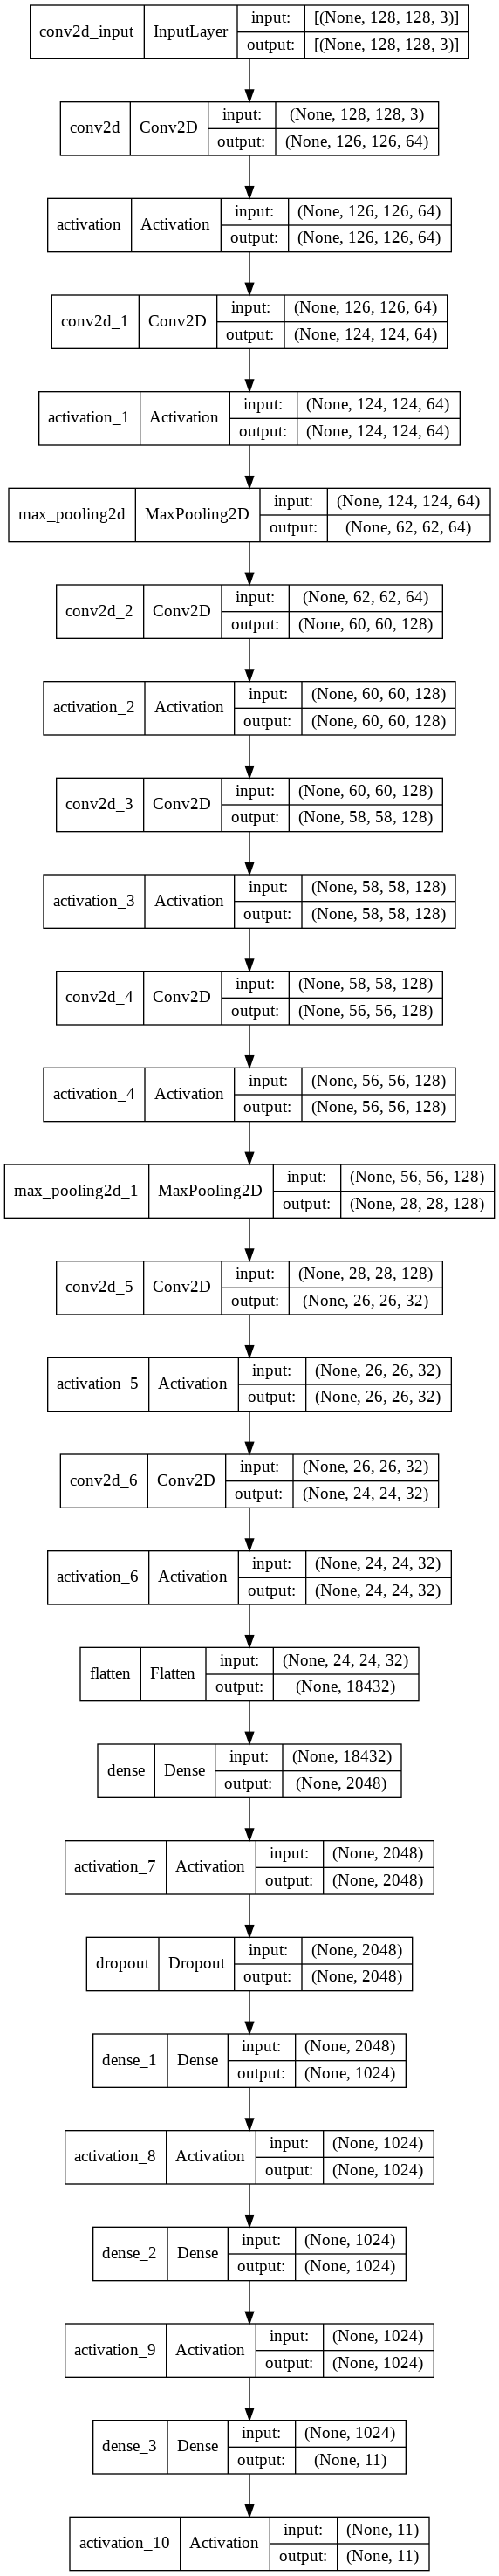

In [ ]:
from tensorflow import keras 
keras.utils.plot_model(model, "duagram.png",show_shapes=True)

In [ ]:
history.history

{'accuracy': [0.22108036279678345,
  0.4516468942165375,
  0.5146244764328003,
  0.5472990870475769,
  0.5602108240127563,
  0.5852437615394592,
  0.58339923620224,
  0.6026350259780884,
  0.6097496747970581,
  0.6063241362571716,
  0.6223978996276855,
  0.6242424249649048,
  0.6321475505828857,
  0.6445322632789612,
  0.6445322632789612,
  0.6476943492889404,
  0.6508563756942749,
  0.6545454263687134,
  0.6577075123786926,
  0.6679841876029968,
  0.6756258010864258,
  0.6719367504119873,
  0.6700922250747681,
  0.6756258010864258,
  0.6693016886711121,
  0.6814229488372803,
  0.6845849752426147,
  0.6988142132759094,
  0.6967061758041382,
  0.6911725997924805,
  0.6924901008605957,
  0.7019762992858887,
  0.7164690494537354,
  0.7030302882194519,
  0.7090908885002136,
  0.7159420251846313,
  0.7164690494537354,
  0.7148880362510681,
  0.7338603138923645,
  0.7246376872062683,
  0.7262187004089355,
  0.7191041111946106,
  0.73069828748703,
  0.7367588877677917,
  0.7322793006896973,
 

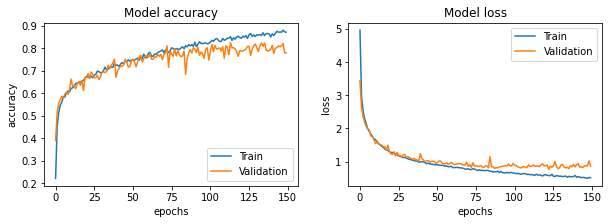

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])

In [ ]:
results = model.evaluate(validation_set, verbose=0)
    
print("    Validation Loss: {:.5f}".format(results[0]))
print("Validation Accuracy: {:.2f}%".format(results[1] * 100))

    Validation Loss: 0.84691
Validation Accuracy: 81.78%


In [ ]:
results = model.evaluate(test_set, verbose=0)
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.71371
Test Accuracy: 82.92%


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  3,  8,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  5,  0,  0,  1,
        1,  1,  1,  1,  7,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  2,  2,
        2,  2,  2,  2,  3,  2,  2,  2,  4,  8,  3,  2,  2,  2,  2,  8,  2,
        2,  2,  3,  2,  2,  8,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8,
        3,  0,  2,  3,  2,  2,  2,  3,  3,  3,  0,  3,  2,  3,  3,  3,  3,
        3, 10,  3,  8,  8,  3,  3,  8,  3,  3,  3,  2,  3,  3,  3,  3,  3,
        2,  3,  3,  3,  3,  3,  3,  1, 10,  6,  3,  0,  0,  3,  3,  3, 10,
        3, 10,  3,  0,  2,  3,  3,  5,  4,  4,  4,  4,  4,  4, 10,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [ ]:
print('Confusion Matrix')
cm=confusion_matrix(test_set.classes, y_pred)
print(cm)


Confusion Matrix
[[43  0  0  3  2  1  0  0  1  0  0]
 [ 0 47  0  0  0  0  1  1  0  1  0]
 [ 1  0 32  6  1  0  0  0  4  0  0]
 [ 4  1  4 33  0  0  1  0  3  0  4]
 [ 0  0  0  0 47  1  0  0  1  0  1]
 [ 0  0  0  0  0 38  1  0  0  0  0]
 [ 3  1  0  1  1  0 30  0  3  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0]
 [ 1  0  2  5  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  3  0 37  0]
 [ 0  0  1  2  4  0  3  0  8  0 31]]


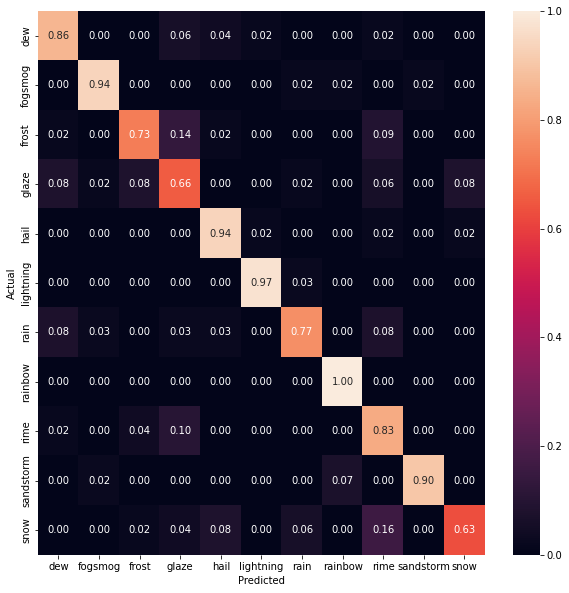

In [ ]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=CLASS1, yticklabels=CLASS1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
print('Classification Report')
cr=classification_report(test_set.classes, y_pred, target_names=CLASS1)
print(cr)

Classification Report
              precision    recall  f1-score   support

         dew       0.83      0.86      0.84        50
     fogsmog       0.94      0.94      0.94        50
       frost       0.82      0.73      0.77        44
       glaze       0.66      0.66      0.66        50
        hail       0.85      0.94      0.90        50
   lightning       0.95      0.97      0.96        39
        rain       0.83      0.77      0.80        39
     rainbow       0.83      1.00      0.91        20
        rime       0.67      0.83      0.74        48
   sandstorm       0.97      0.90      0.94        41
        snow       0.86      0.63      0.73        49

    accuracy                           0.83       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.83      0.83      0.83       480



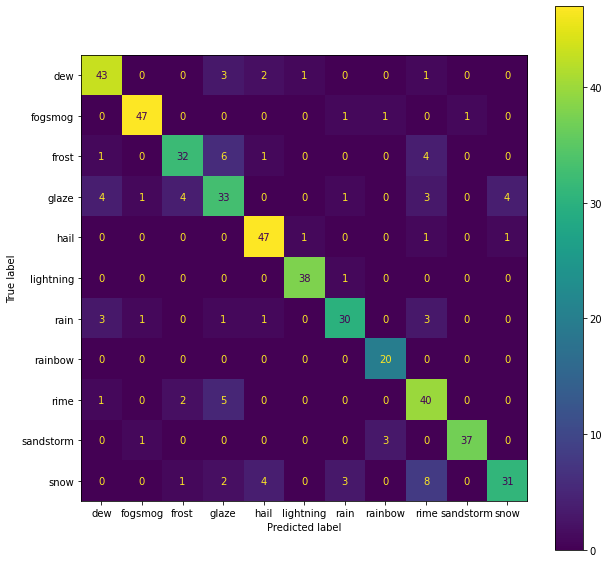

In [ ]:
l= np.array(CLASS1)
type(l)
disp = ConfusionMatrixDisplay(confusion_matrix= cm,  display_labels=l )
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

plt.show()

In [ ]:
test= "/content/output_11/test"
labels = ["dew", "fogsmog" ,"frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]
#labels = ["cloudy","rain","shine","sunrise"]
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [ ]:
x_test = np.array(x)
y_test = np.array(y)

In [ ]:
y_test, y_pred, CLASS1

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4, 

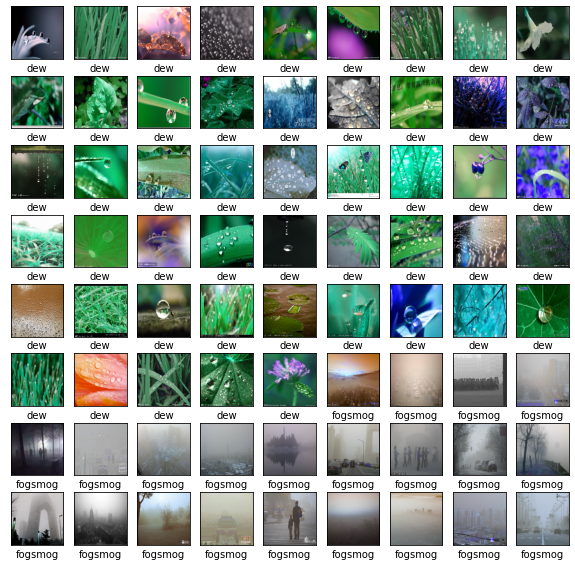

In [ ]:
plt.figure(figsize=(10,10))
for i in range(72):
    plt.subplot(8,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(CLASS1[y_test[i]])
plt.show()

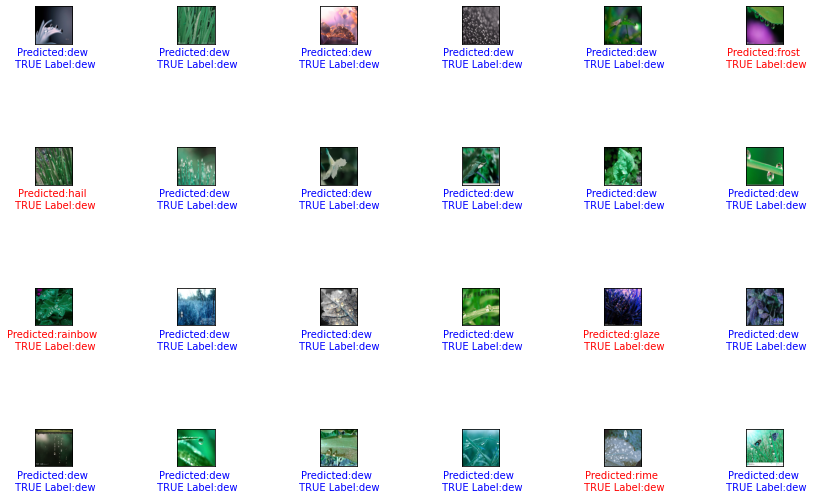

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(12, 8))
for i in range(num_images): 
  plt.subplot(num_rows, 2*num_cols , 2*i+1)
  true_label = y_test[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  
  if y_pred[i] == y_test[i]:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted:{} \n TRUE Label:{}".format( CLASS1[y_pred[i]], CLASS1[y_test[i]]), color=color )
  
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

ROC AUC score: 0.8951867404532138


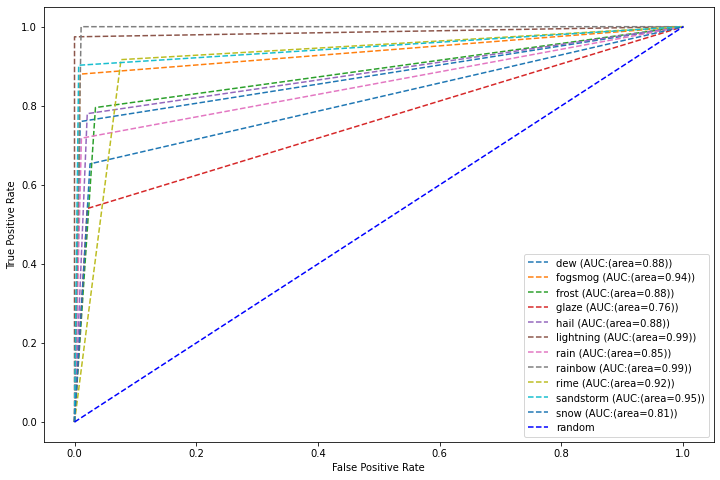

In [ ]:
target=CLASS1

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,'--', label = '%s (AUC:(area=%0.2f))'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b--', label = 'random')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()    

dew (700).jpg


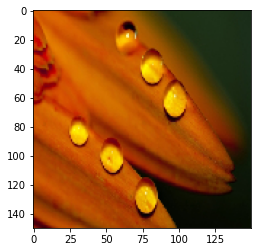

DEW
dew (698).jpg


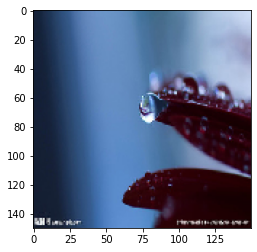

SNOW
dew (696).jpg


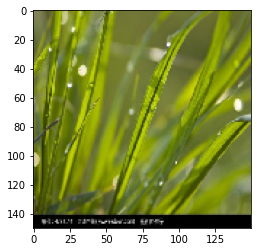

DEW
dew (699).jpg


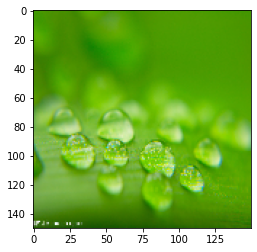

DEW
dew (695).jpg


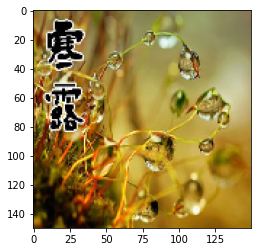

DEW
dew (697).jpg


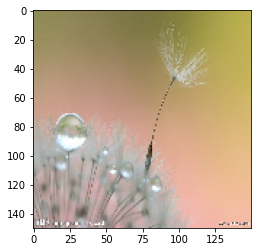

DEW
fogsmog (831).jpg


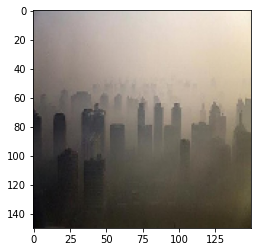

FOGSMOG
fogsmog (829).jpg


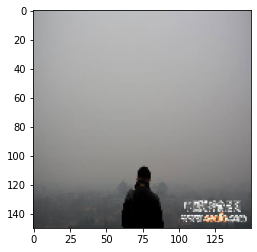

FOGSMOG
fogsmog (826).jpg


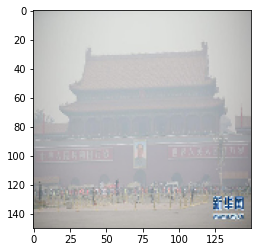

SNOW
fogsmog (827).jpg


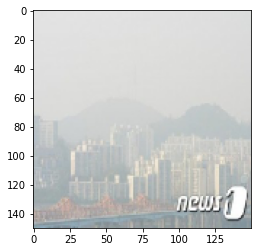

SNOW
fogsmog (828).jpg


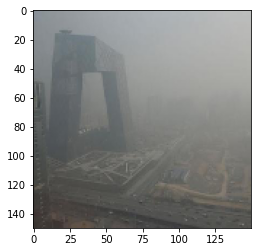

FOGSMOG
fogsmog (830).jpg


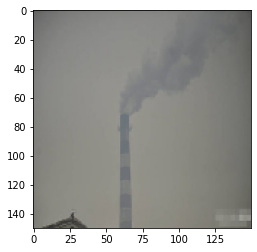

SNOW
frost (267).jpg


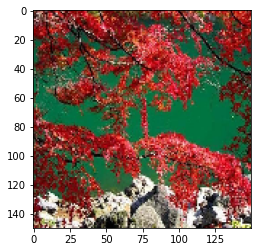

FROST
frost (271).jpg


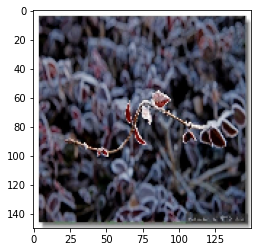

FROST
frost (272).jpg


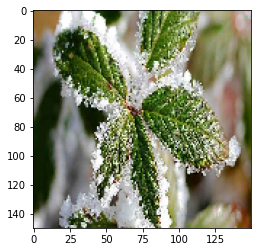

FROST
frost (268).jpg


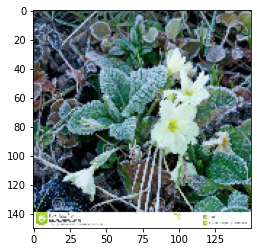

FROST
frost (269).jpg


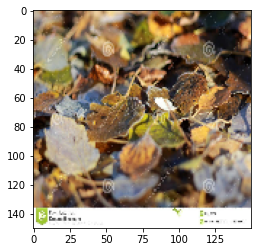

FROST
frost (270).jpg


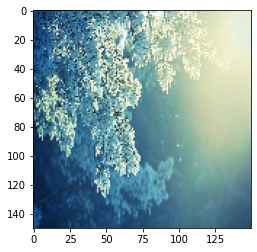

FROST
glaze (369).jpg


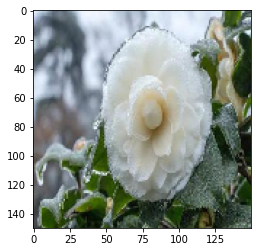

GLAZE
glaze (368).jpg


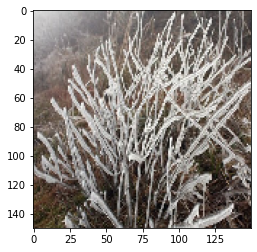

GLAZE
glaze (371).jpg


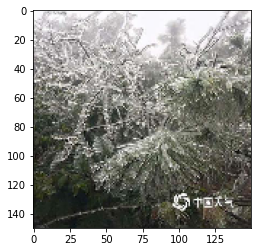

GLAZE
glaze (373).jpg


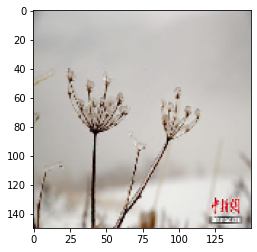

GLAZE
glaze (372).jpg


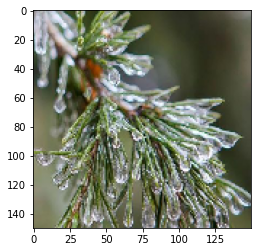

GLAZE
glaze (370).jpg


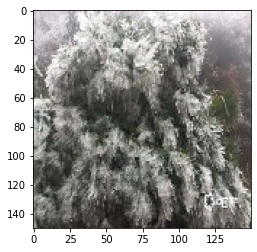

GLAZE
hail (359).jpg


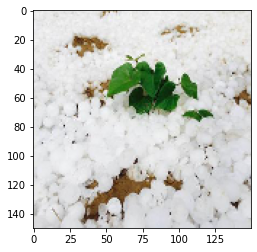

HALL
hail (358).jpg


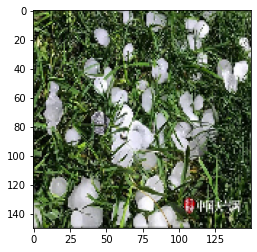

FROST
hail (356).jpg


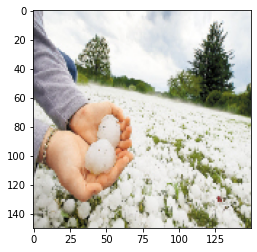

HALL
hail (355).jpg


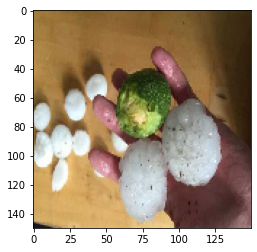

HALL
hail (354).jpg


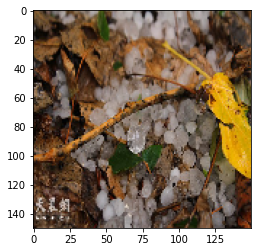

HALL
hail (357).jpg


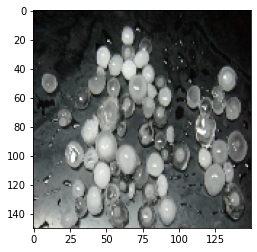

FROST
lightning (325).jpg


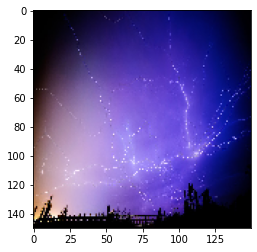

RIME
lightning (322).jpg


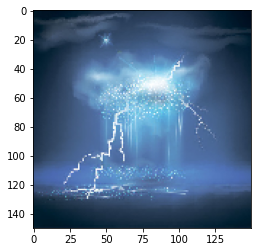

DEW
lightning (323).jpg


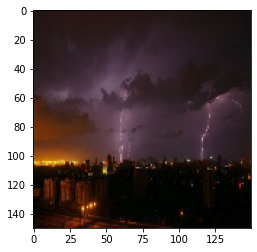

DEW
lightning (320).jpg


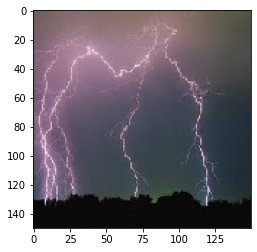

LIGHTNING
lightning (324).jpg


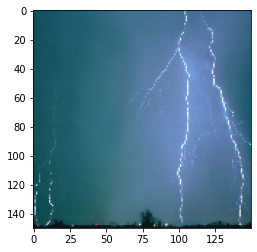

LIGHTNING
lightning (321).jpg


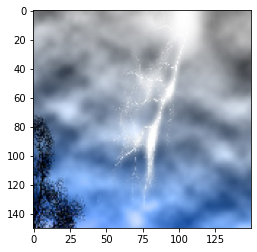

LIGHTNING
rainbow (68).jpg


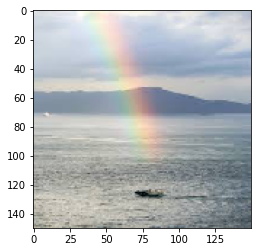

RIME
rainbow (69).jpg


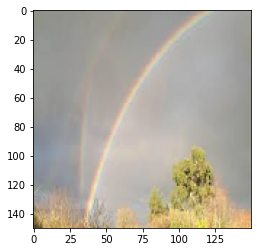

RAINBOW
rainbow (72).jpg


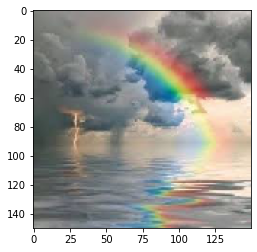

RAIN
rain (333).jpg


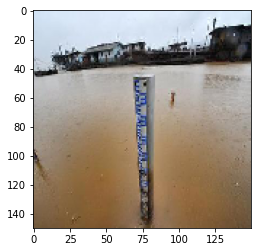

RAIN
rain (334).jpg


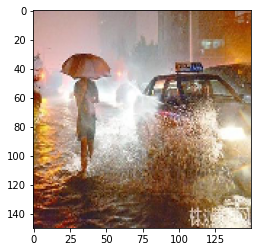

RAIN
rain (331).jpg


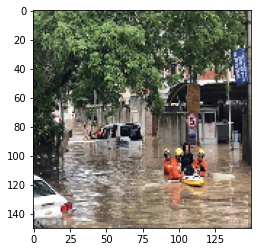

FROST
rain (332).jpg


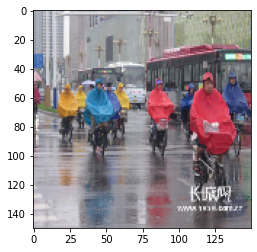

GLAZE
rainbow (70).jpg


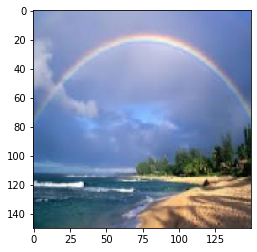

SANDSTORM
rain (335).jpg


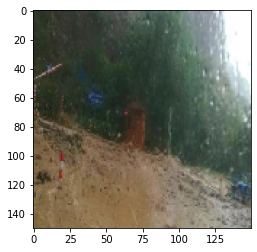

RAIN
rainbow (71).jpg


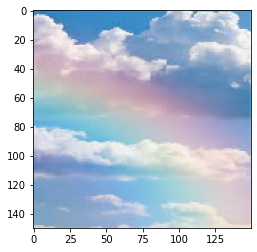

RIME
rainbow (67).jpg


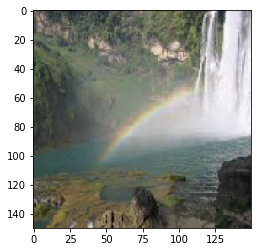

RIME
rime (90).jpg


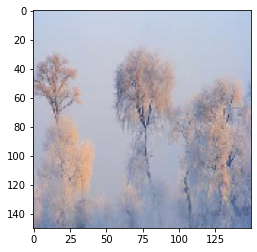

RIME
rime (78).jpg


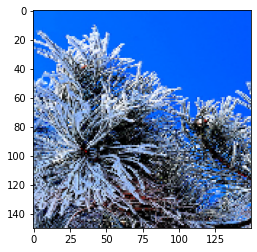

FROST
rime (79).jpg


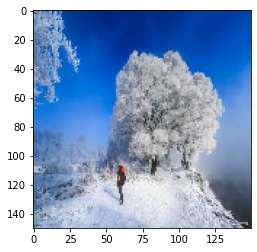

RIME
rime (89).jpg


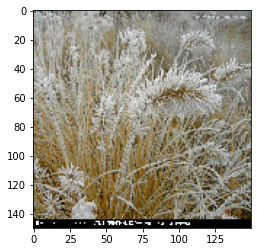

FROST
rime (68).jpg


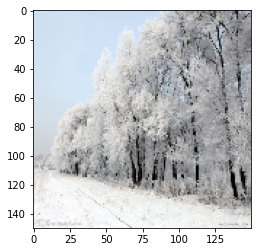

RIME
rime (67).jpg


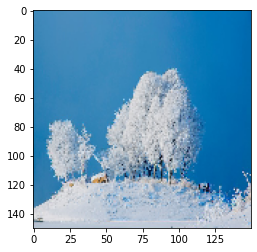

RIME
sandstorm (99).jpg


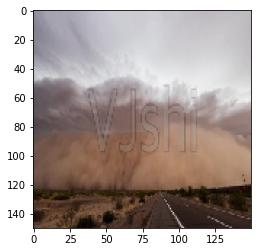

SANDSTORM
sandstorm (97).jpg


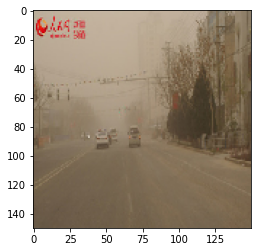

RAIN
sandstorm (100).jpg


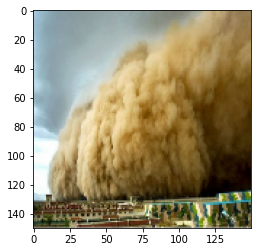

SANDSTORM
sandstorm (98).jpg


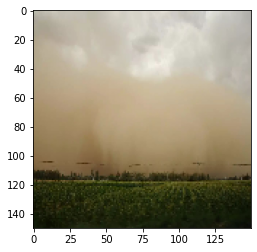

SANDSTORM
sandstorm (96).jpg


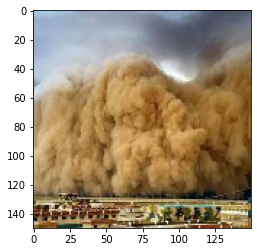

SANDSTORM
sandstorm (89).jpg


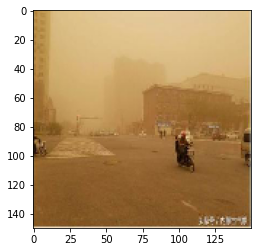

SANDSTORM
snow (90).jpg


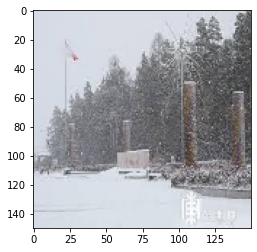

SNOW
snow (89).jpg


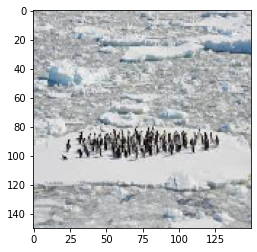

SNOW
snow (98).jpg


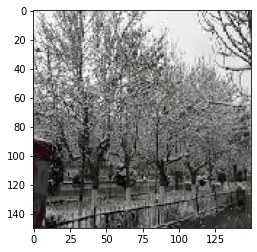

GLAZE
snow (100).jpg


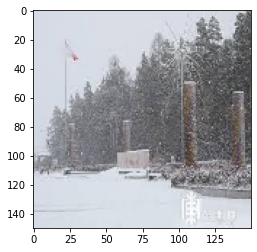

SNOW
snow (99).jpg


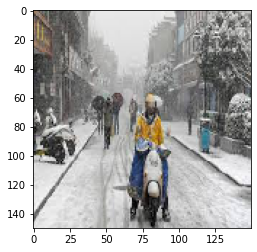

SNOW


In [ ]:
dir_path= '/content/drive/MyDrive/Thesis/TEST'

for i in os.listdir(dir_path):
    print(i)
    img = image.load_img(dir_path+'//'+ i,target_size=(150,150))
    plt.tight_layout()
    plt.imshow(img) 
    
    plt.show(img)

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = X#np.vstack([X])
    result = model.predict(images)

    if result[0][0] > (result[0][1] and result[0][2] and result[0][3] and result[0][4] and result[0][5] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'DEW'
      print(prediction)

    elif result[0][1] > (result[0][0] and result[0][2] and result[0][3] and result[0][4] and result[0][5] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'FOGSMOG'
      print(prediction)

    elif result[0][2] > (result[0][1] and result[0][0] and result[0][3] and result[0][4] and result[0][5] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'FROST'
      print(prediction)

    elif result[0][3] > (result[0][1] and result[0][2] and result[0][0] and result[0][4] and result[0][5] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'GLAZE'
      print(prediction)

    elif result[0][4] > (result[0][1] and result[0][2] and result[0][0] and result[0][0] and result[0][5] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'HALL'
      print(prediction) 

    elif result[0][5] > (result[0][1] and result[0][2] and result[0][0] and result[0][4] and result[0][0] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'LIGHTNING'
      print(prediction)

    elif result[0][6] > (result[0][1] and result[0][2] and result[0][0] and result[0][4] and result[0][5] and result[0][0] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'RAIN'
      print(prediction)

    elif result[0][7] > (result[0][1] and result[0][2] and result[0][0] and result[0][4] and result[0][5] and result[0][6] and result[0][0] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'RAINBOW'
      print(prediction)  

    elif result[0][8] > (result[0][1] and result[0][2] and result[0][0] and result[0][4] and result[0][5] and result[0][6] and result[0][7] and result[0][0] and result[0][9] and result[0][10]): 
      prediction = 'RIME'
      print(prediction)

    elif result[0][9] > (result[0][1] and result[0][2] and result[0][0] and result[0][4] and result[0][5] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][10]): 
      prediction = 'SANDSTORM'
      print(prediction)

    elif result[0][10] > (result[0][1] and result[0][2] and result[0][0] and result[0][4] and result[0][5] and result[0][6] and result[0][7] and result[0][8] and result[0][9] and result[0][0]): 
      prediction = 'SNOW'
      print(prediction) 